In [21]:
curr_loss = 0
val_loss = 100
for epoch in range(100):
    net.train()
    for idx, data in enumerate(text_dataloader,0):
        inputs, labels = data
        inputs = inputs.type(torch.cuda.FloatTensor).transpose(0,1)
        labels = labels.type(torch.cuda.LongTensor)
        optimizer.zero_grad()
    
        outputs = net(inputs)
        labels = labels.squeeze()
        loss = criterion(outputs, labels)
    
        loss.backward()
        curr_loss += loss.item()
    
        optimizer.step()
    
        if idx % 100 == 99:
        
            loss_history.append(curr_loss / 100)
            loss_iter_history.append(loss_curr_iter)
            loss_curr_iter += 1
        
            loss_axis.lines[0].set_xdata(loss_iter_history)
            loss_axis.lines[0].set_ydata(loss_history)
        
            loss_axis.relim()
            loss_axis.autoscale_view()
            loss_axis.figure.canvas.draw()
            print(idx + 1, curr_loss / 100)
            
            curr_loss = 0
    net.eval()
    for idx, data in enumerate(val_dataloader, 0):
        inputs, labels = data
        inputs = inputs.type(torch.cuda.FloatTensor).transpose(0,1)
        labels = labels.type(torch.cuda.LongTensor)
        outputs = net(inputs)
        labels = labels.squeeze()
        loss = criterion(outputs, labels)
        curr_loss += loss.item()
    mean_loss = curr_loss / len(val_dataloader)
    
    if mean_loss < val_loss:
        val_loss = mean_loss
        print(mean_loss)
        torch.save(net.state_dict(), '/home/max/text_generation_with_rnn/Ed_Sheeran_lyrics_gen_dropout_0.25_best_val.pth')
    #print(loss.item())
    

100 0.529833069444
200 0.508612695187
300 0.418420523778
400 0.517598199472
500 0.477105307765
600 0.468022637069
700 0.434280959368
800 0.505892534479
900 0.564822271019
1000 0.503300979771
1100 0.516374266595
1200 0.63587051969
1300 0.541308294982
1400 0.561162283272
1500 0.399285718426
1600 0.410366372317
1700 0.54484579809
1800 0.510153511986
1900 0.547240944277
2000 0.667739736289
2100 0.529489250705
2200 0.418613790274
2300 0.540585298985
2400 0.540033677667
2500 0.516072064191
2600 0.416826749891
2700 0.530917215049
2800 0.473575050905
2900 0.412347918898
3000 0.474958785251
3100 0.583833232895
3200 0.445969257727
3300 0.523702447116
3400 0.568810720146
3500 0.596276494563
3600 0.496746931896
3700 0.486082202867
3800 0.54105165422
3900 0.446015366763
4000 0.424668735377
4100 0.513524480164
4200 0.613716179654
4300 0.558163086567
4400 0.582642139867
4500 0.526735327169
4600 0.578265024051
4700 0.500668629557
4800 0.602626111433
4900 0.4291089857
5000 0.613268470913
5100 0.4871255

Process Process-33:
Process Process-34:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/max/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
  File "/home/max/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/max/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/home/max/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/home/max/anaconda2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    self._target(*self._args, **self._kwargs)
  File "/home/max/anaconda2/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/max/anaconda2/lib/python2.7/multip

KeyboardInterrupt: 

KeyboardInterrupt


In [13]:
torch.save(net.state_dict(), '/home/max/text_generation_with_rnn/Ed_Sheeran_lyrics_gen_dropout_0.25.pth')

In [27]:
start_sample = 'Help me to l'
net.eval()
for i in range(151):
    inputs = One_hot(torch.Tensor([char_to_idx[s] for s in start_sample[i: i + 12]]),voc_size)
    inputs = inputs.type(torch.cuda.FloatTensor)
    inputs = inputs.unsqueeze(0)
    inputs = inputs.transpose(0,1)
    inputs = inputs.expand(12, 4, 69)
    outputs = net(inputs)
    outputs = torch.sum(outputs, dim=0)/text_dataloader.batch_size
    _, idx = torch.max(outputs, 0)
    letter = idx_to_char[int(idx)]
    start_sample += letter
print(start_sample)

Help me to love myself 



The club other then was alone
Are that nother berigh
And I'm not thrown up in so long
I have met an angel and the bands
old your heart i


In [1]:
def One_hot(inputs, num_classes):
    num_dims = inputs.dim()
    inputs_ = inputs.unsqueeze(num_dims).type(torch.LongTensor)
    inputs_shape = list(inputs.size())
    inputs_shape.append(num_classes)
    new_inputs = torch.zeros(size=inputs_shape).type(inputs.type())
    return new_inputs.scatter_(num_dims, inputs_, 1)

In [2]:
from torch.utils.data import Dataset, DataLoader
%matplotlib notebook
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import unicodedata
from __future__ import unicode_literals, print_function, division
import string
CUDA_LAUNCH_BLOCKING=1 


with open('/home/max/text_generation_with_rnn/Ed_Sheeran_lyrics_train.txt', 'r') as file:
    text = file.read()
    file.close()
text = text.decode("utf-8").encode("ascii", "ignore")
text = text.split(' ')
text = ' '.join(text)
chars = sorted(list(set(text)))
char_to_idx = dict((char, idx) for idx, char in enumerate(chars))
idx_to_char = dict((idx, char) for idx, char in enumerate(chars))
voc_size = len(chars)


class TextGenLyricsDataset(Dataset):
    
    def __init__(self, text_file, root_dir, transform=None):
        with open(root_dir + text_file, 'r') as file:
            self.text_file = file.read()
            file.close()
        self.text_file = self.text_file.decode("utf-8").encode("ascii", "ignore")
        self.text_file = self.text_file.split(' ')
        self.text_file = ' '.join(self.text_file)
        self.sequences = []
        for i in range(12, len(self.text_file)):
            self.sequences.append(self.text_file[i - 12 : i + 1])
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        input_seq = self.sequences[idx][:-1]
        letter = self.sequences[idx][-1]
        input_seq = torch.Tensor([char_to_idx[s] for s in input_seq])
        letter = torch.Tensor([char_to_idx[letter]])
        input_seq = One_hot(input_seq, voc_size)
        return input_seq, letter 

In [3]:
text_dataset = TextGenLyricsDataset('Ed_Sheeran_lyrics_train.txt','/home/max/text_generation_with_rnn/')
val_dataset = TextGenLyricsDataset('Ed_Sheeran_lyrics_val.txt','/home/max/text_generation_with_rnn/')

In [4]:
text_dataloader = DataLoader(text_dataset, batch_size=4, shuffle=True, num_workers=2,drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2,drop_last=True)

<IPython.core.display.Javascript object>


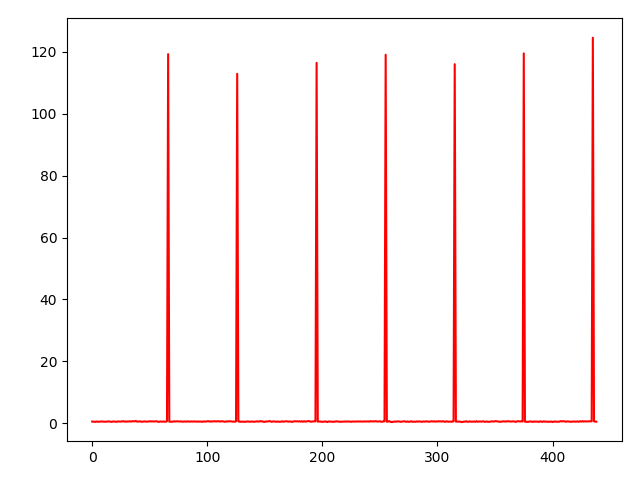

In [5]:
class Net(nn.Module):
    
    
    def __init__(self):
        super(Net, self).__init__()
        self.LSTM = nn.LSTM(voc_size, 50, 2)
        self.dropout = nn.Dropout(p=0.25)
        self.linear = nn.Linear(text_dataloader.batch_size * 600, text_dataloader.batch_size * voc_size)
        self.hidden = nn.Parameter(torch.randn(2, text_dataloader.batch_size, 50, requires_grad=True).cuda())
        self.cell = nn.Parameter(torch.randn(2, text_dataloader.batch_size, 50, requires_grad=True).cuda())
    
    def forward(self, x):
        x, (_, _) = self.LSTM(x, (self.hidden, self.cell))
        x = self.dropout(x)
        #x = x.transpose(0, 1).contiguous()
        x = self.linear(x.view(-1))
        x = x.view(text_dataloader.batch_size, -1)
        return x
            

net = Net().cuda()
net.train()
net.load_state_dict(torch.load('/home/max/text_generation_with_rnn/Ed_Sheeran_lyrics_gen_dropout_0.25.pth'))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)


loss_history = []
loss_iter_history = []
loss_curr_iter = 0

f, loss_axis = plt.subplots(1,1)
loss_axis.plot(loss_history, loss_iter_history, 'r')

plt.tight_layout()